##LIBRERIAS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##SUBIMOS LOS ARCHIVOS

In [ ]:
# Ruta a la carpeta en tu Google Drive
folder_path = '/content/drive/MyDrive/ProyectoCoBios/Cuestionario_Clima_2023_Co_Depurado.xlsx'
df = pd.read_excel(folder_path,header=1)

In [ ]:
df.head()

,Marca temporal,Código de la institución,1. Nombre de la institución,2. Tipo de Institución,3. Denominación de los servicios instituciones en salud,4. Área de trabajo.,5. Edad (años cumplidos),6. Sexo,7. Estado civil,8. Escolaridad,...,Equidad,Compromiso con la productividad,Compatibilidad de intereses,Intercambio de información,Involucración al cambio,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN,Id
0,2018-12-17 09:16:57.471,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,30,Mujer,Casado,Técnico,...,3,5,4,1,3,3.75,4.00,4.00,3.25,0
1,2018-12-21 15:26:21.193,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,27,Hombre,Soltero,Universitaria,...,3,5,5,4,4,4.75,4.75,3.50,4.50,1
2,2018-12-21 15:33:46.427,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,21,Mujer,Soltero,Técnico,...,2,5,5,4,4,4.50,4.50,3.25,4.50,2
3,2018-12-21 15:46:42.083,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,22,Mujer,Soltero,Universitaria,...,4,5,4,3,3,4.50,4.50,3.75,3.75,3
4,2018-12-21 15:59:00.247,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,43,Mujer,Soltero,Secundaria,...,3,5,5,4,4,4.50,4.25,3.50,4.50,4


##Preproceso

In [ ]:
### VERIFICAMOS SI HAY FILAS CON VALORES NULOS
# Verificar si existen valores nulos en el dataframe
NullRows = df.isnull().any(axis=1).any()

# Verificar si existen cadenas vacías en el dataframe
CleanRows = (df == '').any(axis=1).any()

print(NullRows,CleanRows)

False False


In [ ]:
df

,Marca temporal,Código de la institución,1. Nombre de la institución,2. Tipo de Institución,3. Denominación de los servicios instituciones en salud,4. Área de trabajo.,5. Edad (años cumplidos),6. Sexo,7. Estado civil,8. Escolaridad,...,Equidad,Compromiso con la productividad,Compatibilidad de intereses,Intercambio de información,Involucración al cambio,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN,Id
0,2018-12-17 09:16:57.471,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,30,Mujer,Casado,Técnico,...,3,5,4,1,3,3.75,4.00,4.00,3.25,0
1,2018-12-21 15:26:21.193,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,27,Hombre,Soltero,Universitaria,...,3,5,5,4,4,4.75,4.75,3.50,4.50,1
2,2018-12-21 15:33:46.427,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,21,Mujer,Soltero,Técnico,...,2,5,5,4,4,4.50,4.50,3.25,4.50,2
3,2018-12-21 15:46:42.083,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,22,Mujer,Soltero,Universitaria,...,4,5,4,3,3,4.50,4.50,3.75,3.75,3
4,2018-12-21 15:59:00.247,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,43,Mujer,Soltero,Secundaria,...,3,5,5,4,4,4.50,4.25,3.50,4.50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2018-10-24 06:58:23.530,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial ambulatorio,32,Hombre,Unión Libre,Técnico,...,2,4,2,2,5,3.25,3.25,3.50,3.25,2011
2012,2018-10-24 07:03:45.019,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,43,Mujer,Soltero,Universitaria,...,2,3,2,2,0,1.75,3.75,3.50,1.75,2012
2013,2018-10-24 07:18:15.790,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Apoyo operativo,29,Mujer,Soltero,Técnico,...,4,4,3,3,3,3.50,3.75,3.75,3.25,2013
2014,2018-10-24 07:23:00.046,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,37,Hombre,Unión Libre,Técnico,...,2,4,2,3,1,2.75,4.00,3.25,2.50,2014


##ANALIZANDO VARIABLES CUALITATIVAS

In [ ]:
CualitativesValues=[
#'Código de la institución  '
'1. Nombre de la institución '
,'2. Tipo de Institución '
,'3. Denominación de los servicios instituciones en salud '
,'4. Área de trabajo.'
,'5. Edad (años cumplidos)'
,'6. Sexo','7. Estado civil'
,'8. Escolaridad'
,'9. Termino de contratación'
,'10. Tipo de contrato',
'11. Horas laboradas cada día en la institución '
,'12. Tiempo Laborado en la institución'
,'13. Tiempo Laborado en su actual área o servicio'
,'14. Tiempo laborado en su actual cargo']

CualitativesValuesOneHot=[
'1. Nombre de la institución '
,'2. Tipo de Institución '
,'4. Área de trabajo.'
,'6. Sexo'
,'7. Estado civil'
,'9. Termino de contratación'
,'10. Tipo de contrato',
]
CualitativesValuesOneHotPrefix=[
'Nombre de la institución '
,'Tipo de Institución '
,'Área de trabajo.'
,'Sexo'
,'Estado civil'
,'Termino de contratación'
,'Tipo de contrato',
]

CualitativesValuesLabelEncoding=[
'3. Denominación de los servicios instituciones en salud ',
'8. Escolaridad',
'11. Horas laboradas cada día en la institución ',
'12. Tiempo Laborado en la institución',
'13. Tiempo Laborado en su actual área o servicio',
'14. Tiempo laborado en su actual cargo',
]


In [ ]:
##OBSERVAMSO LOS VALORES UNICOS DE CADA COLUMNA CUALITATIVA
## GENERAMOS UN DICCIONARIO CON DICHOS VALORES UNICOS
Dict_data={}
for i in range(len(CualitativesValues)):
   Dict_data[CualitativesValues[i]]=df[CualitativesValues[i]].value_counts()

In [ ]:
Labels=list(Dict_data.keys())

MIRAMOS EL BALANCEO DE LOS DATOS PARA CADA VARIABLE CUALITATIVA

<ipython-input-12-aea12a109311>:27: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
<ipython-input-12-aea12a109311>:27: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
<ipython-input-12-aea12a109311>:27: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
<ipython-input-12-aea12a109311>:27: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
<ipython-input-12-aea12a109311>:27: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
<ipython-input-12-aea12a109311>:27: UserWarning: Tight layout not applied. tight_layo

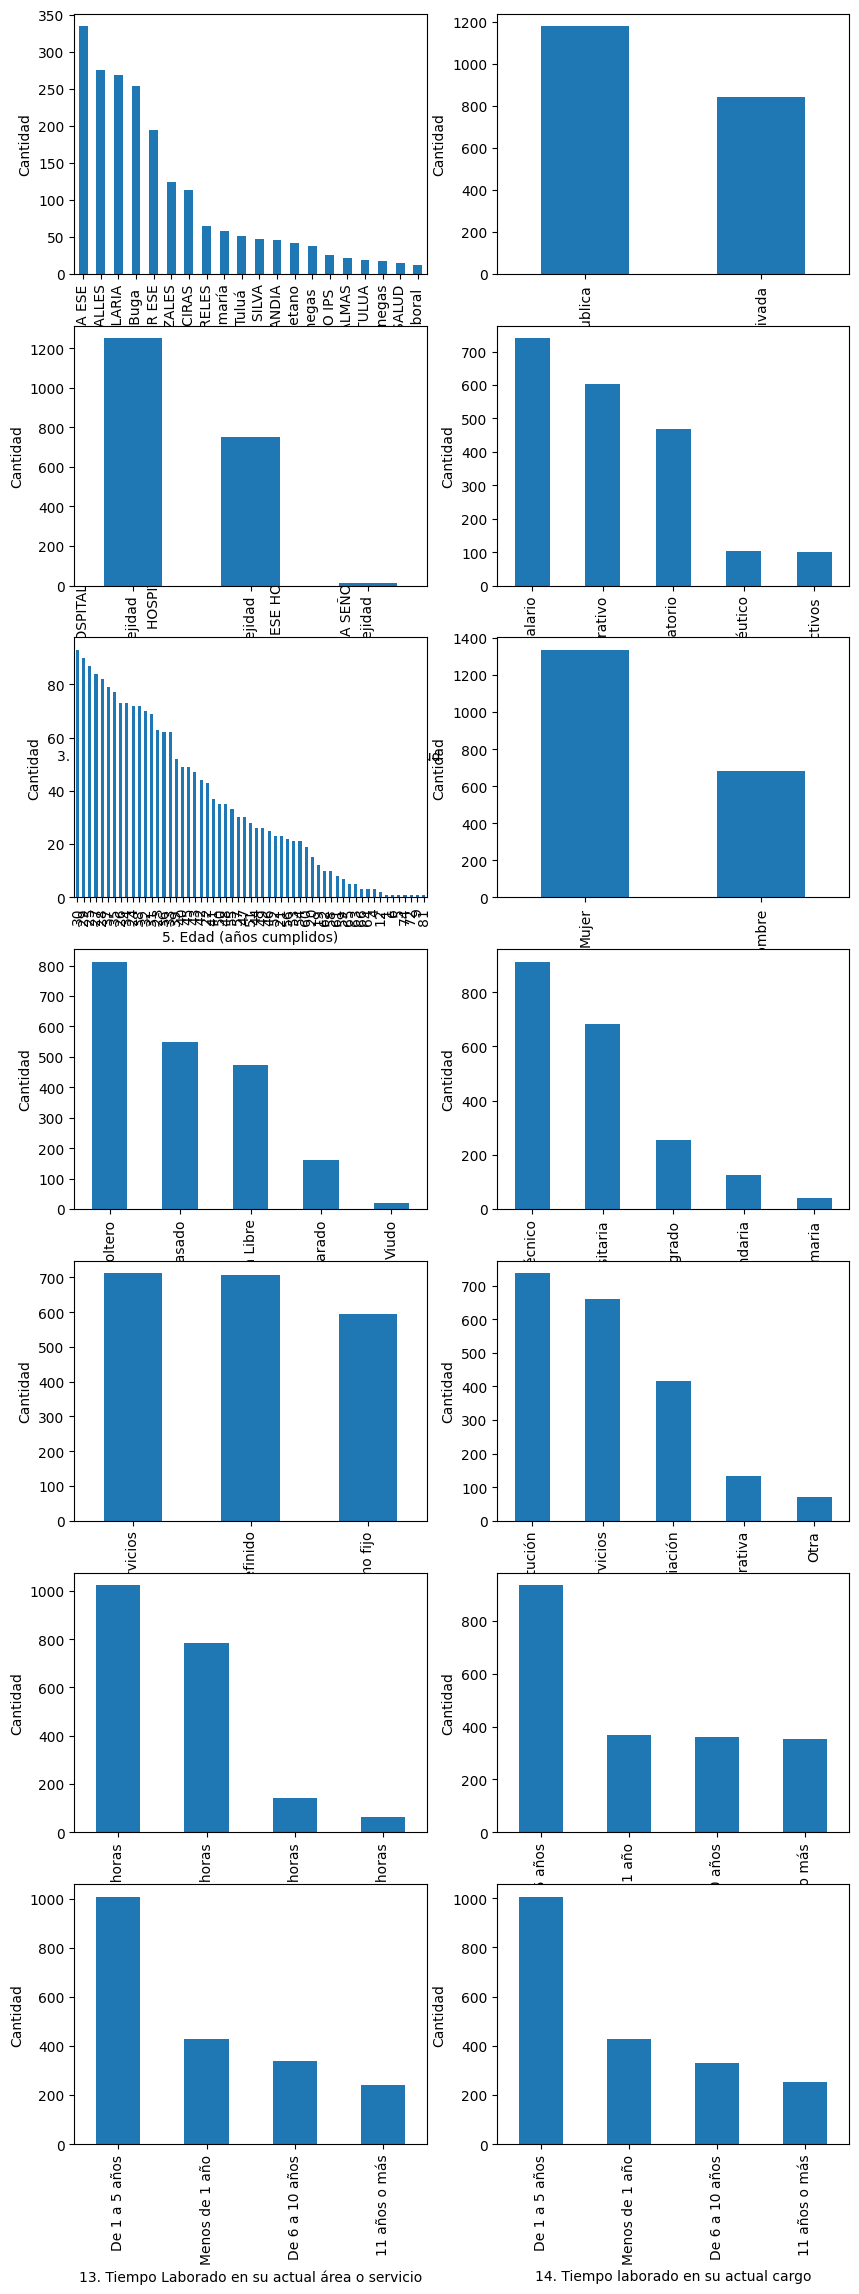

In [ ]:
# Calcular el número de filas y columnas para los subplots
num_filas = len(Dict_data.keys())
num_columnas = 2

# Calcular el tamaño total de la figura
figsize = (10, num_filas * 4)  # Ajusta el tamaño según tus necesidades

# Crear una figura y ejes de subplots con la cantidad de filas y columnas especificadas
fig, axes = plt.subplots(num_filas, num_columnas, figsize=figsize)

# Aplanar la matriz de ejes para facilitar el acceso en el bucle
axes = axes.flatten()

# Iterar sobre las llaves y los valores del diccionario
for i, key in enumerate(Dict_data.keys()):
    # Obtener el eje correspondiente al índice actual
    ax = axes[i]
    
    # Graficar el gráfico tabular de barras en el eje actual
    Dict_data[key].plot(kind='bar', ax=ax)
    
    # Personalizar el gráfico en el eje actual
    ax.set_xlabel(Labels[i])
    ax.set_ylabel('Cantidad')
    
    # Ajustar el espaciado entre los subplots
    plt.tight_layout()

# Eliminar los ejes vacíos si el número de subplots es menor que el número de ejes totales
if len(Dict_data.keys()) < num_filas * num_columnas:
    for j in range(len(Dict_data.keys()), num_filas * num_columnas):
        fig.delaxes(axes[j])

# Mostrar la figura con todos los subplots
plt.show()

Posiblemente podemos tener problemas con el balanceo de los datos iniciales, a la hora de plantear un modelo, pero por el momento podemos realizar un analisis descriptivo que ya se realizo mediante el tablero de power bi 

##ELIMINAMOS COLUMNAS INNECESARIAS PARA EL ANALISIS


In [ ]:
df_filter_cualidades = df.iloc[:,1:16] ##SELECCIONAMOS TODAS LAS FILAS
df_filter_cualidades

,Código de la institución,1. Nombre de la institución,2. Tipo de Institución,3. Denominación de los servicios instituciones en salud,4. Área de trabajo.,5. Edad (años cumplidos),6. Sexo,7. Estado civil,8. Escolaridad,9. Termino de contratación,10. Tipo de contrato,11. Horas laboradas cada día en la institución,12. Tiempo Laborado en la institución,13. Tiempo Laborado en su actual área o servicio,14. Tiempo laborado en su actual cargo
0,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,30,Mujer,Casado,Técnico,Término indefinido,Prestación de servicios,1–4 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
1,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,27,Hombre,Soltero,Universitaria,Término indefinido,Por la institución,9-12 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
2,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,21,Mujer,Soltero,Técnico,Término indefinido,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
3,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,22,Mujer,Soltero,Universitaria,Término indefinido,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
4,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,43,Mujer,Soltero,Secundaria,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial ambulatorio,32,Hombre,Unión Libre,Técnico,Prestación de servicios,Por Cooperativa o asociación,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año
2012,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,43,Mujer,Soltero,Universitaria,Término fijo,Por la institución,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año
2013,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Apoyo operativo,29,Mujer,Soltero,Técnico,Término fijo,Por Cooperativa o asociación,5-8 horas,De 1 a 5 años,Menos de 1 año,Menos de 1 año
2014,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,37,Hombre,Unión Libre,Técnico,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años


##Transformamos las variables cualitativas en categoricas

In [ ]:
# Aplica la codificación one-hot
"""
institución
"""
# Aplica one-hot encoding a las columnas 'genero', 'tipo_contrato' y 'estado_civil'
df_encoded = pd.get_dummies(df_filter_cualidades[CualitativesValuesOneHot], prefix=CualitativesValuesOneHotPrefix)
Arreglo = CualitativesValuesOneHot.copy()+['Código de la institución  ','5. Edad (años cumplidos)']
# Concatena el DataFrame codificado con el DataFrame original
df_OneHot = pd.concat([df_filter_cualidades, df_encoded], axis=1)
df_OneHot.drop(Arreglo, axis=1, inplace=True)
df_OneHot

,3. Denominación de los servicios instituciones en salud,8. Escolaridad,11. Horas laboradas cada día en la institución,12. Tiempo Laborado en la institución,13. Tiempo Laborado en su actual área o servicio,14. Tiempo laborado en su actual cargo,Nombre de la institución _CENTRO MEDICO POR SALUD,Nombre de la institución _CLINICA MARIANGEL TULUA,Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES,Nombre de la institución _CLINICA VERSALLES,...,Estado civil_Unión Libre,Estado civil_Viudo,Termino de contratación_Prestación de servicios,Termino de contratación_Término fijo,Termino de contratación_Término indefinido,Tipo de contrato_Carrera administrativa,Tipo de contrato_Otra,Tipo de contrato_Por Cooperativa o asociación,Tipo de contrato_Por la institución,Tipo de contrato_Prestación de servicios
0,Baja Complejidad,Técnico,1–4 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,Baja Complejidad,Universitaria,9-12 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,Baja Complejidad,Técnico,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,Baja Complejidad,Universitaria,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,Baja Complejidad,Secundaria,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,Mediana complejidad,Técnico,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2012,Mediana complejidad,Universitaria,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2013,Mediana complejidad,Técnico,5-8 horas,De 1 a 5 años,Menos de 1 año,Menos de 1 año,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2014,Mediana complejidad,Técnico,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
df_OneHot['11. Horas laboradas cada día en la institución '].unique()

array(['1–4 horas', '9-12 horas', '5-8 horas', 'Más de 12 horas'],
      dtype=object)

In [ ]:
"""
APLICAMOS LABEL ENCODING A LAS VARIABLES QUE LO AMERITAN
"""
CualitativesValuesLabelEncoding=[
'3. Denominación de los servicios instituciones en salud ',
'8. Escolaridad',
'11. Horas laboradas cada día en la institución ',
'12. Tiempo Laborado en la institución',
'13. Tiempo Laborado en su actual área o servicio',
'14. Tiempo laborado en su actual cargo',
]
df_OneHot['Denominación de los servicios instituciones en salud_encoded'] = df_OneHot['3. Denominación de los servicios instituciones en salud '].map({'Alta complejidad': 2, 'Baja Complejidad': 0, 'Mediana complejidad':1})
df_OneHot['Escolaridad_encoded'] = df_OneHot['8. Escolaridad'].map({'Primaria': 0, 'Secundaria': 1,'Técnico':2,'Universitaria':3,'Posgrado':4})
df_OneHot['Horas laboradas_encoded'] = df_OneHot['11. Horas laboradas cada día en la institución '].map({'1–4 horas':0, '5-8 horas':1,'9-12 horas':2,'Más de 12 horas':3})
df_OneHot['Tiempo_institución_encoded'] = df_OneHot['12. Tiempo Laborado en la institución'].map({'De 1 a 5 años': 1, 'De 6 a 10 años': 2 ,'Menos de 1 año':0,'11 años o más':3})
df_OneHot['Tiempo_servicio_encoded'] = df_OneHot['13. Tiempo Laborado en su actual área o servicio'].map({'De 1 a 5 años': 1, 'De 6 a 10 años': 2 ,'Menos de 1 año':0,'11 años o más':3})
df_OneHot['Tiempo_actual_encoded'] = df_OneHot['14. Tiempo laborado en su actual cargo'].map({'De 1 a 5 años': 1, 'De 6 a 10 años': 2 ,'Menos de 1 año':0,'11 años o más':3})
df_OneHot.drop(CualitativesValuesLabelEncoding, axis=1, inplace=True)

In [ ]:
df_OneHot.head(35)

,Nombre de la institución _CENTRO MEDICO POR SALUD,Nombre de la institución _CLINICA MARIANGEL TULUA,Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES,Nombre de la institución _CLINICA VERSALLES,Nombre de la institución _Centro médico laboral,Nombre de la institución _Christus sinergia Tuluá,Nombre de la institución _ESE CAMILO TRUJILLO SILVA,Nombre de la institución _ESE HOSPITAL LOCAL DE CANDELARIA,Nombre de la institución _ESE HOSPITAL MUNICIPAL ALGECIRAS,Nombre de la institución _ESE HOSPITAL SAN VICENTE DE PAUL DE FILANDIA,...,Tipo de contrato_Otra,Tipo de contrato_Por Cooperativa o asociación,Tipo de contrato_Por la institución,Tipo de contrato_Prestación de servicios,Denominación de los servicios instituciones en salud_encoded,Escolaridad_encoded,Horas laboradas_encoded,Tiempo_institución_encoded,Tiempo_servicio_encoded,Tiempo_actual_encoded
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,2,0,1,1,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,3,2,1,1,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,2,1,1,1,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,3,1,1,1,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
5,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,2,1,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,2,1,0,1,1
7,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,2,2,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,2,2,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,2,1,0,0,0


In [ ]:
##DEFINIMOS LAS SALIDAS
df_filter_values = df.iloc[:,176:]
df_filter_values

,Dirección,Estímulo a la excelencia,Estímulo al trabajo en equipo,Solución de conflictos,Realización personal,Reconocimiento de la aportación,Responsabilidad,Adecuación de las condiciones de trabajo,Aplicación al trabajo,Cuidado del patrimonio institucional,...,Equidad,Compromiso con la productividad,Compatibilidad de intereses,Intercambio de información,Involucración al cambio,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN,Id
0,4,4,4,3,4,5,2,5,5,5,...,3,5,4,1,3,3.75,4.00,4.00,3.25,0
1,5,4,5,5,4,5,5,5,4,4,...,3,5,5,4,4,4.75,4.75,3.50,4.50,1
2,4,5,4,5,4,5,4,5,4,4,...,2,5,5,4,4,4.50,4.50,3.25,4.50,2
3,4,5,4,5,4,5,4,5,4,5,...,4,5,4,3,3,4.50,4.50,3.75,3.75,3
4,4,4,5,5,4,5,3,5,4,4,...,3,5,5,4,4,4.50,4.25,3.50,4.50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2,3,4,4,2,4,3,4,5,4,...,2,4,2,2,5,3.25,3.25,3.50,3.25,2011
2012,1,2,2,2,4,4,3,4,5,3,...,2,3,2,2,0,1.75,3.75,3.50,1.75,2012
2013,3,4,3,4,3,4,3,5,5,4,...,4,4,3,3,3,3.50,3.75,3.75,3.25,2013
2014,2,2,4,3,4,4,3,5,5,4,...,2,4,2,3,1,2.75,4.00,3.25,2.50,2014


In [ ]:
df_OneHot = pd.concat([df_OneHot, df_filter_values], axis=1)

In [ ]:
df_OneHot

,Nombre de la institución _CENTRO MEDICO POR SALUD,Nombre de la institución _CLINICA MARIANGEL TULUA,Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES,Nombre de la institución _CLINICA VERSALLES,Nombre de la institución _Centro médico laboral,Nombre de la institución _Christus sinergia Tuluá,Nombre de la institución _ESE CAMILO TRUJILLO SILVA,Nombre de la institución _ESE HOSPITAL LOCAL DE CANDELARIA,Nombre de la institución _ESE HOSPITAL MUNICIPAL ALGECIRAS,Nombre de la institución _ESE HOSPITAL SAN VICENTE DE PAUL DE FILANDIA,...,Equidad,Compromiso con la productividad,Compatibilidad de intereses,Intercambio de información,Involucración al cambio,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN,Id
0,0,0,0,0,1,0,0,0,0,0,...,3,5,4,1,3,3.75,4.00,4.00,3.25,0
1,0,0,0,0,1,0,0,0,0,0,...,3,5,5,4,4,4.75,4.75,3.50,4.50,1
2,0,0,0,0,1,0,0,0,0,0,...,2,5,5,4,4,4.50,4.50,3.25,4.50,2
3,0,0,0,0,1,0,0,0,0,0,...,4,5,4,3,3,4.50,4.50,3.75,3.75,3
4,0,0,0,0,1,0,0,0,0,0,...,3,5,5,4,4,4.50,4.25,3.50,4.50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0,0,0,0,0,0,0,0,0,0,...,2,4,2,2,5,3.25,3.25,3.50,3.25,2011
2012,0,0,0,0,0,0,0,0,0,0,...,2,3,2,2,0,1.75,3.75,3.50,1.75,2012
2013,0,0,0,0,0,0,0,0,0,0,...,4,4,3,3,3,3.50,3.75,3.75,3.25,2013
2014,0,0,0,0,0,0,0,0,0,0,...,2,4,2,3,1,2.75,4.00,3.25,2.50,2014


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_OneHot

,Nombre de la institución _CENTRO MEDICO POR SALUD,Nombre de la institución _CLINICA MARIANGEL TULUA,Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES,Nombre de la institución _CLINICA VERSALLES,Nombre de la institución _Centro médico laboral,Nombre de la institución _Christus sinergia Tuluá,Nombre de la institución _ESE CAMILO TRUJILLO SILVA,Nombre de la institución _ESE HOSPITAL LOCAL DE CANDELARIA,Nombre de la institución _ESE HOSPITAL MUNICIPAL ALGECIRAS,Nombre de la institución _ESE HOSPITAL SAN VICENTE DE PAUL DE FILANDIA,Nombre de la institución _ESE Hospital Arsenio Repizo Vanegas,Nombre de la institución _ESE Hospital Arsenio Repizo Vanegas,Nombre de la institución _Fundación Hospital San José de Buga,Nombre de la institución _HOSPITAL DEPARTAMENTAL MARIA INMACULADA ESE,Nombre de la institución _HOSPITAL FRANCISCO DE PAULA SANTANDER ESE,Nombre de la institución _HOSPITAL NUESTRA SEÑORA DE BELEN DE SALAZAR DE LAS PALMAS,Nombre de la institución _Hospital San Antonio de Villamaría,Nombre de la institución _Hospital San Cayetano,Nombre de la institución _PROSALCO IPS,Nombre de la institución _VIVA 1A IPS LAURELES,Tipo de Institución _Privada,Tipo de Institución _Publica,Área de trabajo._Apoyo diagnostico y terapéutico,Área de trabajo._Apoyo operativo,Área de trabajo._Asistencial ambulatorio,Área de trabajo._Asistencial hospitalario,Área de trabajo._Directivos,Sexo_Hombre,Sexo_Mujer,Estado civil_Casado,Estado civil_Separado,Estado civil_Soltero,Estado civil_Unión Libre,Estado civil_Viudo,Termino de contratación_Prestación de servicios,Termino de contratación_Término fijo,Termino de contratación_Término indefinido,Tipo de contrato_Carrera administrativa,Tipo de contrato_Otra,Tipo de contrato_Por Cooperativa o asociación,Tipo de contrato_Por la institución,Tipo de contrato_Prestación de servicios,Denominación de los servicios instituciones en salud_encoded,Escolaridad_encoded,Horas laboradas_encoded,Tiempo_institución_encoded,Tiempo_servicio_encoded,Tiempo_actual_encoded,Dirección,Estímulo a la excelencia,Estímulo al trabajo en equipo,Solución de conflictos,Realización personal,Reconocimiento de la aportación,Responsabilidad,Adecuación de las condiciones de trabajo,Aplicación al trabajo,Cuidado del patrimonio institucional,Retribución,Equidad,Compromiso con la productividad,Compatibilidad de intereses,Intercambio de información,Involucración al cambio,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN,Id
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,2,0,1,1,1,4,4,4,3,4,5,2,5,5,5,3,3,5,4,1,3,3.75,4.00,4.00,3.25,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,3,2,1,1,1,5,4,5,5,4,5,5,5,4,4,3,3,5,5,4,4,4.75,4.75,3.50,4.50,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,2,1,1,1,1,4,5,4,5,4,5,4,5,4,4,3,2,5,5,4,4,4.50,4.50,3.25,4.50,2
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,3,1,1,1,1,4,5,4,5,4,5,4,5,4,5,2,4,5,4,3,3,4.50,4.50,3.75,3.75,3
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,4,4,5,5,4,5,3,5,4,4,3,3,5,5,4,4,4.50,4.25,3.50,4.50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,2,1,0,0,0,2,3,4,4,2,4,3,4,5,4,3,2,4,2,2,5,3.25,3.25,3.50,3.25,2011
2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,3,1,0,0,0,1,2,2,2,4,4,3,4,5,3,4,2,3,2,2,0,1.75,3.75,3.50,1.75,2012
2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,2,1,1,0,0,3,4,3,4,3,4,3,5,5,4,2,4,4,3,3,3,3.50,3.75,3.75,3.25,2013
2014,0,0,0,0,0,0,0,0,0,0

Finalizado la conversión a variables categoricas pasamos a medir correlaciones

In [ ]:
matriz_correlacion =df_OneHot.corr()

In [ ]:
pd.set_option('display.max_rows', 69)

##LIDERAZGO

In [ ]:
pd.DataFrame(matriz_correlacion.loc[['LIDERAZGO','Dirección','Estímulo a la excelencia','Estímulo al trabajo en equipo','Solución de conflictos']])

,Nombre de la institución _CENTRO MEDICO POR SALUD,Nombre de la institución _CLINICA MARIANGEL TULUA,Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES,Nombre de la institución _CLINICA VERSALLES,Nombre de la institución _Centro médico laboral,Nombre de la institución _Christus sinergia Tuluá,Nombre de la institución _ESE CAMILO TRUJILLO SILVA,Nombre de la institución _ESE HOSPITAL LOCAL DE CANDELARIA,Nombre de la institución _ESE HOSPITAL MUNICIPAL ALGECIRAS,Nombre de la institución _ESE HOSPITAL SAN VICENTE DE PAUL DE FILANDIA,Nombre de la institución _ESE Hospital Arsenio Repizo Vanegas,Nombre de la institución _ESE Hospital Arsenio Repizo Vanegas,Nombre de la institución _Fundación Hospital San José de Buga,Nombre de la institución _HOSPITAL DEPARTAMENTAL MARIA INMACULADA ESE,Nombre de la institución _HOSPITAL FRANCISCO DE PAULA SANTANDER ESE,Nombre de la institución _HOSPITAL NUESTRA SEÑORA DE BELEN DE SALAZAR DE LAS PALMAS,Nombre de la institución _Hospital San Antonio de Villamaría,Nombre de la institución _Hospital San Cayetano,Nombre de la institución _PROSALCO IPS,Nombre de la institución _VIVA 1A IPS LAURELES,Tipo de Institución _Privada,Tipo de Institución _Publica,Área de trabajo._Apoyo diagnostico y terapéutico,Área de trabajo._Apoyo operativo,Área de trabajo._Asistencial ambulatorio,Área de trabajo._Asistencial hospitalario,Área de trabajo._Directivos,Sexo_Hombre,Sexo_Mujer,Estado civil_Casado,Estado civil_Separado,Estado civil_Soltero,Estado civil_Unión Libre,Estado civil_Viudo,Termino de contratación_Prestación de servicios,Termino de contratación_Término fijo,Termino de contratación_Término indefinido,Tipo de contrato_Carrera administrativa,Tipo de contrato_Otra,Tipo de contrato_Por Cooperativa o asociación,Tipo de contrato_Por la institución,Tipo de contrato_Prestación de servicios,Denominación de los servicios instituciones en salud_encoded,Escolaridad_encoded,Horas laboradas_encoded,Tiempo_institución_encoded,Tiempo_servicio_encoded,Tiempo_actual_encoded,Dirección,Estímulo a la excelencia,Estímulo al trabajo en equipo,Solución de conflictos,Realización personal,Reconocimiento de la aportación,Responsabilidad,Adecuación de las condiciones de trabajo,Aplicación al trabajo,Cuidado del patrimonio institucional,Retribución,Equidad,Compromiso con la productividad,Compatibilidad de intereses,Intercambio de información,Involucración al cambio,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN,Id
LIDERAZGO,0.119339,0.086232,0.344256,0.112109,0.136407,0.145444,-0.049503,-0.001788,-0.096596,-0.015443,-0.084201,-0.054797,-0.034191,-0.094923,-0.165820,-0.045654,-0.057837,-0.023772,-0.037170,-0.044006,0.304151,-0.304151,-0.020435,-0.060043,-0.055029,0.102497,0.027171,-0.029569,0.029569,0.017104,-0.024977,0.034415,-0.048918,0.030113,-0.090635,0.122944,-0.026780,-0.122304,-0.036211,-0.061812,0.208542,-0.081698,0.067651,-0.007355,-0.030107,-0.027597,-0.019396,-0.010255,0.729398,0.592792,0.670925,0.643741,0.331112,0.304282,0.148419,0.370222,0.330177,0.309054,0.052578,0.207648,0.482295,0.477713,0.328519,0.350501,1.000000,0.399096,0.379300,0.606425,-0.374757
Dirección,0.131765,0.073422,0.276152,0.089841,0.094522,0.145097,-0.015783,-0.043744,-0.037993,-0.037601,-0.016427,-0.030796,-0.035105,-0.065906,-0.151606,-0.030966,-0.018241,-0.044295,-0.030716,-0.065092,0.240356,-0.240356,-0.028532,-0.071796,-0.018360,0.104026,-0.014737,-0.052446,0.052446,-0.014718,-0.055135,0.058652,-0.026527,0.039978,-0.062833,0.074380,-0.008191,-0.151646,-0.007782,-0.068194,0.185587,-0.048139,0.035458,0.003577,0.007381,-0.035545,-0.026031,-0.017499,1.000000,0.246930,0.359680,0.336958,0.216565,0.228104,0.121217,0.295248,0.233547,0.234666,0.007227,0.164718,0.331518,0.337675,0.279444,0.293211,0.729398,0.300847,0.270648,0.458172,-0.324825
Estímulo a la excelencia,0.057898,0.056840,0.262316,0.174465,0.106197,0.088437,-0.103185,-0.033540,-0.163900,-0.006631,-0.064700,-0.066985,-0.118758,0.032092,-0.083267,-0.085300,-0.050350,-0.058750,-0.036460,0.

##MOTIVACIÓN

In [ ]:
pd.DataFrame(matriz_correlacion.loc[['MOTIVACIÓN','Realización personal','Reconocimiento de la aportación','Responsabilidad','Adecuación de las condiciones de trabajo']])

,Nombre de la institución _CENTRO MEDICO POR SALUD,Nombre de la institución _CLINICA MARIANGEL TULUA,Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES,Nombre de la institución _CLINICA VERSALLES,Nombre de la institución _Centro médico laboral,Nombre de la institución _Christus sinergia Tuluá,Nombre de la institución _ESE CAMILO TRUJILLO SILVA,Nombre de la institución _ESE HOSPITAL LOCAL DE CANDELARIA,Nombre de la institución _ESE HOSPITAL MUNICIPAL ALGECIRAS,Nombre de la institución _ESE HOSPITAL SAN VICENTE DE PAUL DE FILANDIA,Nombre de la institución _ESE Hospital Arsenio Repizo Vanegas,Nombre de la institución _ESE Hospital Arsenio Repizo Vanegas,Nombre de la institución _Fundación Hospital San José de Buga,Nombre de la institución _HOSPITAL DEPARTAMENTAL MARIA INMACULADA ESE,Nombre de la institución _HOSPITAL FRANCISCO DE PAULA SANTANDER ESE,Nombre de la institución _HOSPITAL NUESTRA SEÑORA DE BELEN DE SALAZAR DE LAS PALMAS,Nombre de la institución _Hospital San Antonio de Villamaría,Nombre de la institución _Hospital San Cayetano,Nombre de la institución _PROSALCO IPS,Nombre de la institución _VIVA 1A IPS LAURELES,Tipo de Institución _Privada,Tipo de Institución _Publica,Área de trabajo._Apoyo diagnostico y terapéutico,Área de trabajo._Apoyo operativo,Área de trabajo._Asistencial ambulatorio,Área de trabajo._Asistencial hospitalario,Área de trabajo._Directivos,Sexo_Hombre,Sexo_Mujer,Estado civil_Casado,Estado civil_Separado,Estado civil_Soltero,Estado civil_Unión Libre,Estado civil_Viudo,Termino de contratación_Prestación de servicios,Termino de contratación_Término fijo,Termino de contratación_Término indefinido,Tipo de contrato_Carrera administrativa,Tipo de contrato_Otra,Tipo de contrato_Por Cooperativa o asociación,Tipo de contrato_Por la institución,Tipo de contrato_Prestación de servicios,Denominación de los servicios instituciones en salud_encoded,Escolaridad_encoded,Horas laboradas_encoded,Tiempo_institución_encoded,Tiempo_servicio_encoded,Tiempo_actual_encoded,Dirección,Estímulo a la excelencia,Estímulo al trabajo en equipo,Solución de conflictos,Realización personal,Reconocimiento de la aportación,Responsabilidad,Adecuación de las condiciones de trabajo,Aplicación al trabajo,Cuidado del patrimonio institucional,Retribución,Equidad,Compromiso con la productividad,Compatibilidad de intereses,Intercambio de información,Involucración al cambio,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN,Id
MOTIVACIÓN,0.051562,0.006378,0.120004,-0.042726,0.089584,-0.004312,0.059355,-0.144906,0.040354,0.130065,-0.070954,0.019285,0.241182,0.014247,-0.333698,0.026564,0.007281,0.035157,-0.004724,-0.030505,0.201089,-0.201089,0.022009,0.050068,-0.072236,-0.006330,0.026693,-0.034951,0.034951,-0.039986,-0.019887,0.028217,0.019593,0.010724,-0.017071,-0.009091,0.025784,-0.128201,-0.001404,0.002711,0.072807,-0.008460,-0.006665,-0.032762,-0.105146,-0.081818,-0.082970,-0.066941,0.300847,0.041759,0.105620,0.553639,0.639615,0.796064,0.657958,0.808648,0.591427,0.504023,0.188498,0.242624,0.355925,0.277654,0.203689,-0.024799,0.399096,1.000000,0.644313,0.304596,-0.129243
Realización personal,0.031167,0.012238,0.067113,-0.046761,0.047969,-0.004408,0.006629,0.001706,-0.020648,0.045797,-0.058923,0.037253,0.101965,0.052675,-0.166421,-0.010174,-0.038828,0.028726,-0.018691,-0.051500,0.060844,-0.060844,-0.014748,0.005017,-0.017436,0.035177,-0.039911,-0.054428,0.054428,-0.011857,-0.016343,0.025741,-0.007607,0.003077,-0.019585,0.007934,0.012026,-0.028858,0.015689,-0.002933,0.021244,-0.010079,-0.004373,-0.065310,0.000819,0.018446,-0.005319,0.010085,0.216565,0.053018,0.205463,0.378290,1.000000,0.351447,0.297886,0.369715,0.359996,0.331046,0.132603,0.122152,0.260484,0.191286,0.137921,0.011226,0.331112,0.639615,0.399228,0.225065,-0.082686
Reconocimiento de la aportación,0.071307,0.045873,0.128793,-0.006180,0.107823,-0.063505,0.063093,-0.163061,-0.007576,0.089888,-0.010594,0.000887,0.126599,0.059315,-0.262917,-0.003266,0.022125,0.030561,0.022055,0.0

##RECIPROCIDAD

In [ ]:
pd.DataFrame(matriz_correlacion.loc[['RECIPROCIDAD','Aplicación al trabajo','Cuidado del patrimonio institucional','Retribución','Equidad']])

,Nombre de la institución _CENTRO MEDICO POR SALUD,Nombre de la institución _CLINICA MARIANGEL TULUA,Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES,Nombre de la institución _CLINICA VERSALLES,Nombre de la institución _Centro médico laboral,Nombre de la institución _Christus sinergia Tuluá,Nombre de la institución _ESE CAMILO TRUJILLO SILVA,Nombre de la institución _ESE HOSPITAL LOCAL DE CANDELARIA,Nombre de la institución _ESE HOSPITAL MUNICIPAL ALGECIRAS,Nombre de la institución _ESE HOSPITAL SAN VICENTE DE PAUL DE FILANDIA,Nombre de la institución _ESE Hospital Arsenio Repizo Vanegas,Nombre de la institución _ESE Hospital Arsenio Repizo Vanegas,Nombre de la institución _Fundación Hospital San José de Buga,Nombre de la institución _HOSPITAL DEPARTAMENTAL MARIA INMACULADA ESE,Nombre de la institución _HOSPITAL FRANCISCO DE PAULA SANTANDER ESE,Nombre de la institución _HOSPITAL NUESTRA SEÑORA DE BELEN DE SALAZAR DE LAS PALMAS,Nombre de la institución _Hospital San Antonio de Villamaría,Nombre de la institución _Hospital San Cayetano,Nombre de la institución _PROSALCO IPS,Nombre de la institución _VIVA 1A IPS LAURELES,Tipo de Institución _Privada,Tipo de Institución _Publica,Área de trabajo._Apoyo diagnostico y terapéutico,Área de trabajo._Apoyo operativo,Área de trabajo._Asistencial ambulatorio,Área de trabajo._Asistencial hospitalario,Área de trabajo._Directivos,Sexo_Hombre,Sexo_Mujer,Estado civil_Casado,Estado civil_Separado,Estado civil_Soltero,Estado civil_Unión Libre,Estado civil_Viudo,Termino de contratación_Prestación de servicios,Termino de contratación_Término fijo,Termino de contratación_Término indefinido,Tipo de contrato_Carrera administrativa,Tipo de contrato_Otra,Tipo de contrato_Por Cooperativa o asociación,Tipo de contrato_Por la institución,Tipo de contrato_Prestación de servicios,Denominación de los servicios instituciones en salud_encoded,Escolaridad_encoded,Horas laboradas_encoded,Tiempo_institución_encoded,Tiempo_servicio_encoded,Tiempo_actual_encoded,Dirección,Estímulo a la excelencia,Estímulo al trabajo en equipo,Solución de conflictos,Realización personal,Reconocimiento de la aportación,Responsabilidad,Adecuación de las condiciones de trabajo,Aplicación al trabajo,Cuidado del patrimonio institucional,Retribución,Equidad,Compromiso con la productividad,Compatibilidad de intereses,Intercambio de información,Involucración al cambio,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN,Id
RECIPROCIDAD,0.044933,0.013272,0.103609,-0.000117,0.069818,0.001827,0.027022,-0.182847,-0.016229,0.082014,-0.047913,0.005100,0.211901,0.047573,-0.232548,0.000323,0.015138,-0.003171,-0.024970,-0.006979,0.205933,-0.205933,0.001928,-0.006056,-0.049629,0.055504,-0.015903,-0.025893,0.025893,-0.034051,0.003714,0.019561,0.016000,-0.022306,-0.033245,0.038756,-0.003763,-0.131252,-0.015130,0.051496,0.058685,-0.029073,0.091118,-0.056973,-0.094583,-0.088490,-0.089602,-0.076031,0.270648,0.157242,0.132956,0.406634,0.399228,0.508785,0.403595,0.548634,0.725201,0.698762,0.487785,0.505698,0.403143,0.252724,0.203232,-0.009080,0.379300,0.644313,1.000000,0.319250,-0.087902
Aplicación al trabajo,0.024017,0.033199,0.100938,0.019635,0.055070,0.027199,0.043928,-0.091722,-0.036705,0.080798,-0.052159,-0.028079,0.220706,-0.037387,-0.223390,0.003479,0.012949,0.000480,-0.005413,-0.060811,0.215194,-0.215194,0.016854,0.000500,-0.065409,0.062092,-0.028921,-0.025066,0.025066,-0.016893,-0.001418,0.009525,0.011635,-0.017062,-0.058342,0.033848,0.026059,-0.106284,-0.037842,0.046829,0.072526,-0.043651,0.039521,-0.031183,-0.058202,-0.031448,-0.034035,-0.025249,0.233547,0.098765,0.085780,0.414040,0.359996,0.460437,0.339098,0.537527,1.000000,0.435276,0.112992,0.117307,0.281673,0.185526,0.145213,-0.005863,0.330177,0.591427,0.725201,0.227674,-0.139723
Cuidado del patrimonio institucional,0.053412,0.013719,0.121726,0.025018,0.056876,0.059657,0.006803,-0.181074,0.004025,0.108391,-0.084363,0.018957,0.222574,-0.081724,-0.158914,0.058879,-0.021555,0.001113,-0.0

##PARTICIPACIÓN

In [ ]:
pd.DataFrame(matriz_correlacion.loc[['PARTICIPACIÓN','Compromiso con la productividad','Compatibilidad de intereses','Intercambio de información','Involucración al cambio']])

,Nombre de la institución _CENTRO MEDICO POR SALUD,Nombre de la institución _CLINICA MARIANGEL TULUA,Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES,Nombre de la institución _CLINICA VERSALLES,Nombre de la institución _Centro médico laboral,Nombre de la institución _Christus sinergia Tuluá,Nombre de la institución _ESE CAMILO TRUJILLO SILVA,Nombre de la institución _ESE HOSPITAL LOCAL DE CANDELARIA,Nombre de la institución _ESE HOSPITAL MUNICIPAL ALGECIRAS,Nombre de la institución _ESE HOSPITAL SAN VICENTE DE PAUL DE FILANDIA,Nombre de la institución _ESE Hospital Arsenio Repizo Vanegas,Nombre de la institución _ESE Hospital Arsenio Repizo Vanegas,Nombre de la institución _Fundación Hospital San José de Buga,Nombre de la institución _HOSPITAL DEPARTAMENTAL MARIA INMACULADA ESE,Nombre de la institución _HOSPITAL FRANCISCO DE PAULA SANTANDER ESE,Nombre de la institución _HOSPITAL NUESTRA SEÑORA DE BELEN DE SALAZAR DE LAS PALMAS,Nombre de la institución _Hospital San Antonio de Villamaría,Nombre de la institución _Hospital San Cayetano,Nombre de la institución _PROSALCO IPS,Nombre de la institución _VIVA 1A IPS LAURELES,Tipo de Institución _Privada,Tipo de Institución _Publica,Área de trabajo._Apoyo diagnostico y terapéutico,Área de trabajo._Apoyo operativo,Área de trabajo._Asistencial ambulatorio,Área de trabajo._Asistencial hospitalario,Área de trabajo._Directivos,Sexo_Hombre,Sexo_Mujer,Estado civil_Casado,Estado civil_Separado,Estado civil_Soltero,Estado civil_Unión Libre,Estado civil_Viudo,Termino de contratación_Prestación de servicios,Termino de contratación_Término fijo,Termino de contratación_Término indefinido,Tipo de contrato_Carrera administrativa,Tipo de contrato_Otra,Tipo de contrato_Por Cooperativa o asociación,Tipo de contrato_Por la institución,Tipo de contrato_Prestación de servicios,Denominación de los servicios instituciones en salud_encoded,Escolaridad_encoded,Horas laboradas_encoded,Tiempo_institución_encoded,Tiempo_servicio_encoded,Tiempo_actual_encoded,Dirección,Estímulo a la excelencia,Estímulo al trabajo en equipo,Solución de conflictos,Realización personal,Reconocimiento de la aportación,Responsabilidad,Adecuación de las condiciones de trabajo,Aplicación al trabajo,Cuidado del patrimonio institucional,Retribución,Equidad,Compromiso con la productividad,Compatibilidad de intereses,Intercambio de información,Involucración al cambio,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN,Id
PARTICIPACIÓN,0.125584,0.074837,0.331223,0.108482,0.127257,0.129186,-0.056032,-0.086505,-0.070747,-0.029668,-0.070319,-0.039346,-0.065079,-0.046114,-0.099813,-0.046338,-0.038054,-0.039222,-0.028295,-0.036461,0.271141,-0.271141,-0.052625,-0.027899,-0.054709,0.098637,-0.000035,-0.004399,0.004399,0.015795,-0.031508,0.038779,-0.041388,0.000088,-0.128490,0.168368,-0.032300,-0.091680,0.014084,-0.048741,0.216906,-0.137454,0.113355,-0.005898,-0.056757,-0.015968,-0.027905,-0.025298,0.458172,0.399832,0.449927,0.306054,0.225065,0.211782,0.154448,0.290066,0.227674,0.241018,0.076832,0.223385,0.689888,0.716965,0.665010,0.642102,0.606425,0.304596,0.319250,1.000000,-0.306122
Compromiso con la productividad,0.085781,0.067111,0.255336,0.135035,0.109597,0.063384,-0.059749,-0.143926,-0.111971,-0.027794,-0.044910,-0.046154,-0.018304,0.078447,-0.135392,-0.092943,-0.021422,-0.024121,-0.029733,-0.027519,0.254627,-0.254627,-0.042850,-0.036597,-0.054061,0.106360,-0.010096,0.010964,-0.010964,-0.020348,0.005219,0.012523,0.001314,0.009574,-0.154106,0.146183,0.014557,-0.082302,0.026489,-0.035407,0.202054,-0.143531,0.198018,-0.069477,-0.093227,-0.055809,-0.076699,-0.054007,0.331518,0.335090,0.356832,0.256968,0.260484,0.307492,0.158418,0.298972,0.281673,0.279469,0.254747,0.162315,1.000000,0.384034,0.264424,0.181612,0.482295,0.355925,0.403143,0.689888,-0.217397
Compatibilidad de intereses,0.083152,0.044063,0.275063,0.099351,0.095915,0.110055,-0.008807,-0.082821,-0.036002,-0.045467,-0.054757,-0.035192,-0.056439,-0.074470,-0.113487,0.059127,-0.010

Mirando modelos de regresión

eliminando variables innecesarias como el genero, edad, Estado civil

In [ ]:
df_OneHot.iloc[:,:27]

,Nombre de la institución _CENTRO MEDICO POR SALUD,Nombre de la institución _CLINICA MARIANGEL TULUA,Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES,Nombre de la institución _CLINICA VERSALLES,Nombre de la institución _Centro médico laboral,Nombre de la institución _Christus sinergia Tuluá,Nombre de la institución _ESE CAMILO TRUJILLO SILVA,Nombre de la institución _ESE HOSPITAL LOCAL DE CANDELARIA,Nombre de la institución _ESE HOSPITAL MUNICIPAL ALGECIRAS,Nombre de la institución _ESE HOSPITAL SAN VICENTE DE PAUL DE FILANDIA,Nombre de la institución _ESE Hospital Arsenio Repizo Vanegas,Nombre de la institución _ESE Hospital Arsenio Repizo Vanegas,Nombre de la institución _Fundación Hospital San José de Buga,Nombre de la institución _HOSPITAL DEPARTAMENTAL MARIA INMACULADA ESE,Nombre de la institución _HOSPITAL FRANCISCO DE PAULA SANTANDER ESE,Nombre de la institución _HOSPITAL NUESTRA SEÑORA DE BELEN DE SALAZAR DE LAS PALMAS,Nombre de la institución _Hospital San Antonio de Villamaría,Nombre de la institución _Hospital San Cayetano,Nombre de la institución _PROSALCO IPS,Nombre de la institución _VIVA 1A IPS LAURELES,Tipo de Institución _Privada,Tipo de Institución _Publica,Área de trabajo._Apoyo diagnostico y terapéutico,Área de trabajo._Apoyo operativo,Área de trabajo._Asistencial ambulatorio,Área de trabajo._Asistencial hospitalario,Área de trabajo._Directivos
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0


In [ ]:
X=df_OneHot.iloc[:,:48] ## CONJUNTO ENTRADA
Y=df_OneHot.iloc[:,48:49] ## SALIDA
Y

,Dirección
0,4
1,5
2,4
3,4
4,4
...,...
2011,2
2012,1
2013,3
2014,2


In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión Ridge
ridge_model = Ridge(alpha=10)  # Puedes ajustar el valor de alpha según tus necesidades
ridge_model.fit(X_train, y_train)

# Crear y entrenar el modelo de regresión Lasso
lasso_model = Lasso(alpha=10)  # Puedes ajustar el valor de alpha según tus necesidades
lasso_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando el error cuadrático medio (MSE)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

print("Error cuadrático medio (MSE) - Ridge: {:.4f}".format(ridge_mse))
print("Error cuadrático medio (MSE) - Lasso: {:.4f}".format(lasso_mse))

Error cuadrático medio (MSE) - Ridge: 0.9964
Error cuadrático medio (MSE) - Lasso: 1.1473


In [ ]:
areas = ['LIDERAZGO', 'MOTIVACIÓN', 'RECIPROCIDAD', 'PARTICIPACIÓN']

##LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Obtención de los coeficientes de regresión
coeficientes = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_[0]})

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# Métricas del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[  0   0   0   1   0   0]
 [  0   1   1  13   6   1]
 [  0   1  11  57   7   3]
 [  0   0   6 131   3  13]
 [  0   0   8  60   8  23]
 [  0   0   1  16   6  27]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.05      0.08        22
           2       0.41      0.14      0.21        79
           3       0.47      0.86      0.61       153
           4       0.27      0.08      0.12        99
           5       0.40      0.54      0.46        50

    accuracy                           0.44       404
   macro avg       0.34      0.28      0.25       404
weighted avg       0.40      0.44      0.36       404



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
coeficientes_sorted = coeficientes.sort_values(by='Coeficiente', ascending=False)
coeficientes_sorted

,Variable,Coeficiente
22,Área de trabajo._Apoyo diagnostico y terapéutico,0.931730
14,Nombre de la institución _HOSPITAL FRANCISCO D...,0.778137
37,Tipo de contrato_Carrera administrativa,0.656227
12,Nombre de la institución _Fundación Hospital S...,0.509786
42,Denominación de los servicios instituciones en...,0.481648
3,Nombre de la institución _CLINICA VERSALLES,0.441355
44,Horas laboradas_encoded,0.235461
46,Tiempo_servicio_encoded,0.155868
34,Termino de contratación_Prestación de servicios,0.148435
29,Estado civil_Casado,0.137795


##MIRANDO POR OTRO LADO

In [ ]:
datos_encoded = pd.get_dummies(df_filter_cualidades, columns=CualitativesValues, drop_first=True)

In [ ]:
datos_encoded

,Código de la institución,1. Nombre de la institución _CLINICA MARIANGEL TULUA,1. Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES,1. Nombre de la institución _CLINICA VERSALLES,1. Nombre de la institución _Centro médico laboral,1. Nombre de la institución _Christus sinergia Tuluá,1. Nombre de la institución _ESE CAMILO TRUJILLO SILVA,1. Nombre de la institución _ESE HOSPITAL LOCAL DE CANDELARIA,1. Nombre de la institución _ESE HOSPITAL MUNICIPAL ALGECIRAS,1. Nombre de la institución _ESE HOSPITAL SAN VICENTE DE PAUL DE FILANDIA,1. Nombre de la institución _ESE Hospital Arsenio Repizo Vanegas,1. Nombre de la institución _ESE Hospital Arsenio Repizo Vanegas,1. Nombre de la institución _Fundación Hospital San José de Buga,1. Nombre de la institución _HOSPITAL DEPARTAMENTAL MARIA INMACULADA ESE,1. Nombre de la institución _HOSPITAL FRANCISCO DE PAULA SANTANDER ESE,1. Nombre de la institución _HOSPITAL NUESTRA SEÑORA DE BELEN DE SALAZAR DE LAS PALMAS,1. Nombre de la institución _Hospital San Antonio de Villamaría,1. Nombre de la institución _Hospital San Cayetano,1. Nombre de la institución _PROSALCO IPS,1. Nombre de la institución _VIVA 1A IPS LAURELES,2. Tipo de Institución _Publica,3. Denominación de los servicios instituciones en salud _Baja Complejidad,3. Denominación de los servicios instituciones en salud _Mediana complejidad,4. Área de trabajo._Apoyo operativo,4. Área de trabajo._Asistencial ambulatorio,4. Área de trabajo._Asistencial hospitalario,4. Área de trabajo._Directivos,5. Edad (años cumplidos)_4,5. Edad (años cumplidos)_5,5. Edad (años cumplidos)_6,5. Edad (años cumplidos)_9,5. Edad (años cumplidos)_12,5. Edad (años cumplidos)_19,5. Edad (años cumplidos)_20,5. Edad (años cumplidos)_21,5. Edad (años cumplidos)_22,5. Edad (años cumplidos)_23,5. Edad (años cumplidos)_24,5. Edad (años cumplidos)_25,5. Edad (años cumplidos)_26,5. Edad (años cumplidos)_27,5. Edad (años cumplidos)_28,5. Edad (años cumplidos)_29,5. Edad (años cumplidos)_30,5. Edad (años cumplidos)_31,5. Edad (años cumplidos)_32,5. Edad (años cumplidos)_33,5. Edad (años cumplidos)_34,5. Edad (años cumplidos)_35,5. Edad (años cumplidos)_36,5. Edad (años cumplidos)_37,5. Edad (años cumplidos)_38,5. Edad (años cumplidos)_39,5. Edad (años cumplidos)_40,5. Edad (años cumplidos)_41,5. Edad (años cumplidos)_42,5. Edad (años cumplidos)_43,5. Edad (años cumplidos)_44,5. Edad (años cumplidos)_45,5. Edad (años cumplidos)_46,5. Edad (años cumplidos)_47,5. Edad (años cumplidos)_48,5. Edad (años cumplidos)_49,5. Edad (años cumplidos)_50,5. Edad (años cumplidos)_51,5. Edad (años cumplidos)_52,5. Edad (años cumplidos)_53,5. Edad (años cumplidos)_54,5. Edad (años cumplidos)_55,5. Edad (años cumplidos)_56,5. Edad (años cumplidos)_57,5. Edad (años cumplidos)_58,5. Edad (años cumplidos)_59,5. Edad (años cumplidos)_60,5. Edad (años cumplidos)_61,5. Edad (años cumplidos)_62,5. Edad (años cumplidos)_63,5. Edad (años cumplidos)_64,5. Edad (años cumplidos)_65,5. Edad (años cumplidos)_66,5. Edad (años cumplidos)_72,5. Edad (años cumplidos)_74,5. Edad (años cumplidos)_81,6. Sexo_Mujer,7. Estado civil_Separado,7. Estado civil_Soltero,7. Estado civil_Unión Libre,7. Estado civil_Viudo,8. Escolaridad_Primaria,8. Escolaridad_Secundaria,8. Escolaridad_Técnico,8. Escolaridad_Universitaria,9. Termino de contratación_Término fijo,9. Termino de contratación_Término indefinido,10. Tipo de contrato_Otra,10. Tipo de contrato_Por Cooperativa o asociación,10. Tipo de contrato_Por la institución,10. Tipo de contrato_Prestación de servicios,11. Horas laboradas cada día en la institución _5-8 horas,11. Horas laboradas cada día en la institución _9-12 horas,11. Horas laboradas cada día en la institución _Más de 12 horas,12. Tiempo Laborado en la institución_De 1 a 5 años,12. Tiempo Laborado en la institución_De 6 a 10 años,12. Tiempo Laborado en la institución_Menos de 1 año,13. Tiempo Laborado en su actual área o servicio_De 1 a 5 años,13. Tiempo Laborado en su actual área o servicio_D

In [ ]:
datos_encoded['1. Nombre de la institución _CLINICA MARIANGEL TULUA'].unique()

array([0, 1], dtype=uint8)

In [ ]:
# Realizar un análisis de regresión
# X_datos = datos_encoded
# X = pd.get_dummies(X, drop_first=True)  # Codificar variables cualitativas
X = sm.add_constant(X)  # Añadir constante para el modelo
y = df_filter_values["LIDERAZGO"]
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              LIDERAZGO   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     17.88
Date:                Thu, 25 May 2023   Prob (F-statistic):          2.13e-106
Time:                        04:31:43   Log-Likelihood:                -1867.0
No. Observations:                2016   AIC:                             3818.
Df Residuals:                    1974   BIC:                             4054.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [ ]:
df_filter=df_filter_cualidades.drop(['5. Edad (años cumplidos)'], axis=1)
df_filter

,Código de la institución,1. Nombre de la institución,2. Tipo de Institución,3. Denominación de los servicios instituciones en salud,4. Área de trabajo.,6. Sexo,7. Estado civil,8. Escolaridad,9. Termino de contratación,10. Tipo de contrato,11. Horas laboradas cada día en la institución,12. Tiempo Laborado en la institución,13. Tiempo Laborado en su actual área o servicio,14. Tiempo laborado en su actual cargo
0,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,Mujer,Casado,Técnico,Término indefinido,Prestación de servicios,1–4 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
1,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,Hombre,Soltero,Universitaria,Término indefinido,Por la institución,9-12 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
2,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,Mujer,Soltero,Técnico,Término indefinido,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
3,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,Mujer,Soltero,Universitaria,Término indefinido,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
4,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,Mujer,Soltero,Secundaria,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial ambulatorio,Hombre,Unión Libre,Técnico,Prestación de servicios,Por Cooperativa o asociación,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año
2012,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,Mujer,Soltero,Universitaria,Término fijo,Por la institución,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año
2013,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Apoyo operativo,Mujer,Soltero,Técnico,Término fijo,Por Cooperativa o asociación,5-8 horas,De 1 a 5 años,Menos de 1 año,Menos de 1 año
2014,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,Hombre,Unión Libre,Técnico,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años


##LIDERAZGO MEJORES DATOS

DIRECCIÓN

In [ ]:
CONCATENATE=pd.concat([df_filter, df_filter_values.iloc[:,0]], axis=1)
CONCATENATE

,Código de la institución,1. Nombre de la institución,2. Tipo de Institución,3. Denominación de los servicios instituciones en salud,4. Área de trabajo.,6. Sexo,7. Estado civil,8. Escolaridad,9. Termino de contratación,10. Tipo de contrato,11. Horas laboradas cada día en la institución,12. Tiempo Laborado en la institución,13. Tiempo Laborado en su actual área o servicio,14. Tiempo laborado en su actual cargo,Dirección
0,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,Mujer,Casado,Técnico,Término indefinido,Prestación de servicios,1–4 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,4
1,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,Hombre,Soltero,Universitaria,Término indefinido,Por la institución,9-12 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,5
2,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,Mujer,Soltero,Técnico,Término indefinido,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,4
3,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,Mujer,Soltero,Universitaria,Término indefinido,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,4
4,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,Mujer,Soltero,Secundaria,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial ambulatorio,Hombre,Unión Libre,Técnico,Prestación de servicios,Por Cooperativa o asociación,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año,2
2012,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,Mujer,Soltero,Universitaria,Término fijo,Por la institución,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año,1
2013,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Apoyo operativo,Mujer,Soltero,Técnico,Término fijo,Por Cooperativa o asociación,5-8 horas,De 1 a 5 años,Menos de 1 año,Menos de 1 año,3
2014,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,Hombre,Unión Libre,Técnico,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,2


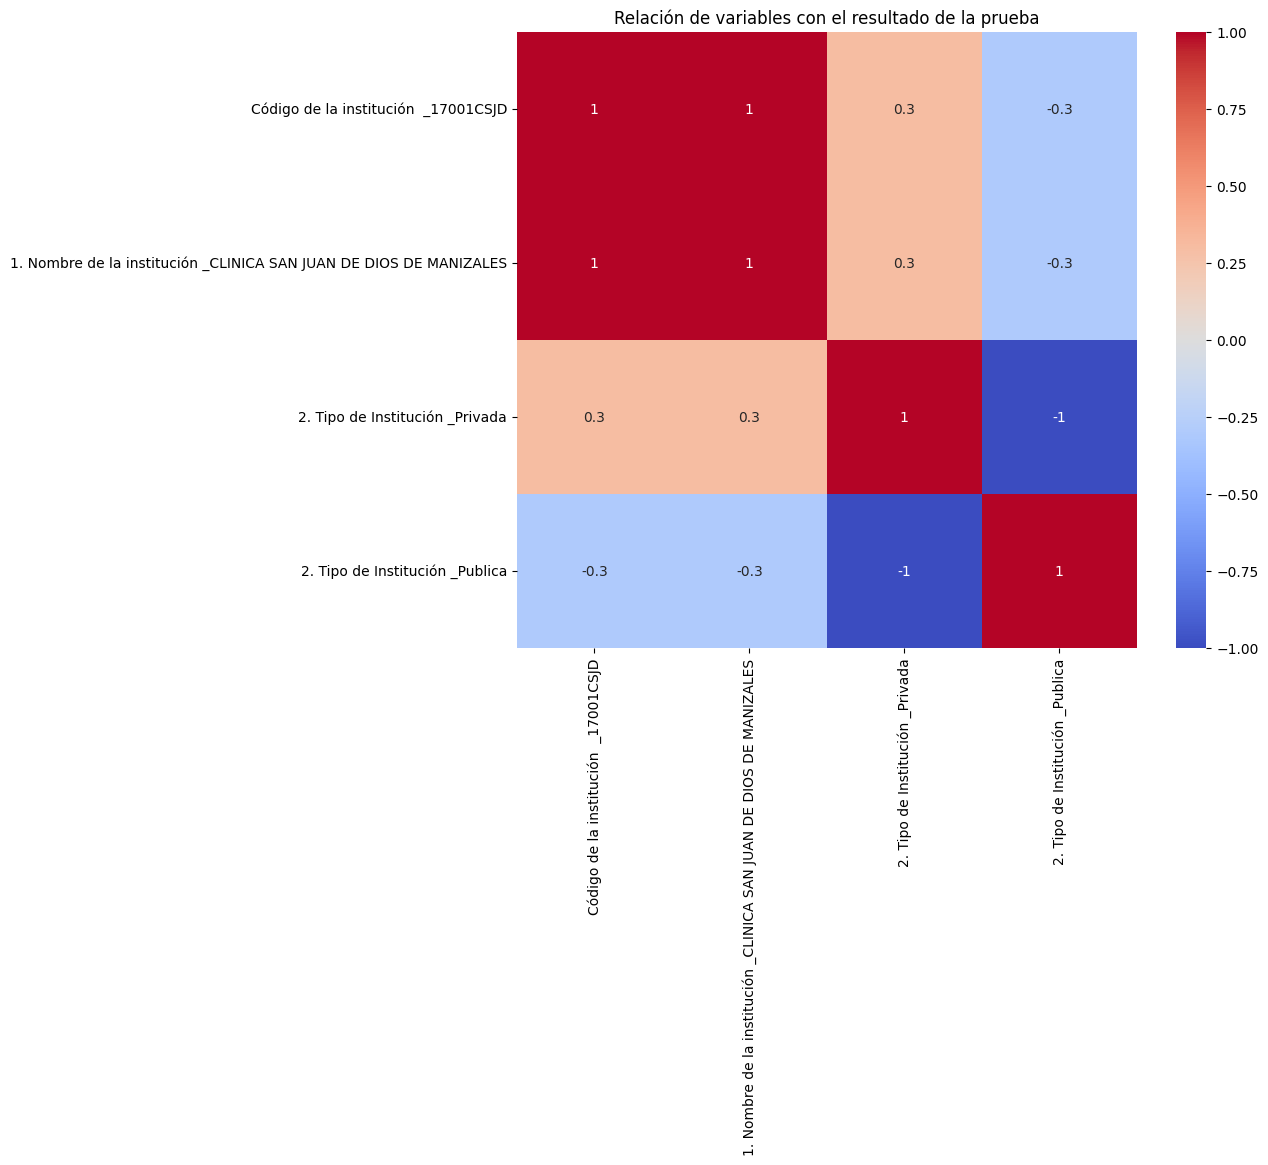

Variables relacionadas con Estímulo a la excelencia:
Código de la institución  _17001CSJD                                  0.276152
1. Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES    0.276152
2. Tipo de Institución _Privada                                       0.240356
2. Tipo de Institución _Publica                                      -0.240356
Name: Resultado, dtype: float64


In [ ]:
# Conversión de variables cualitativas a numéricas
data_encoded = pd.get_dummies(CONCATENATE.iloc[:, :-1])

# Agregar columna de resultado
data_encoded['Resultado'] = CONCATENATE['Dirección']

# Cálculo de correlaciones
correlations = data_encoded.corr()


# Eliminar variables sin relación
correlations = correlations['Resultado'].drop('Resultado')
correlations = correlations[correlations.abs() > 0.2]  # Establecer umbral de relación

# Filtrar DataFrame con las variables relacionadas
data_filtered = data_encoded[correlations.index]

# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(data_filtered.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Relación de variables con el resultado de la prueba')
plt.show()

# Imprimir variables relacionadas
print("Variables relacionadas con Estímulo a la excelencia:")
print(correlations)

ESTIMULO A LA EXCELENCIA

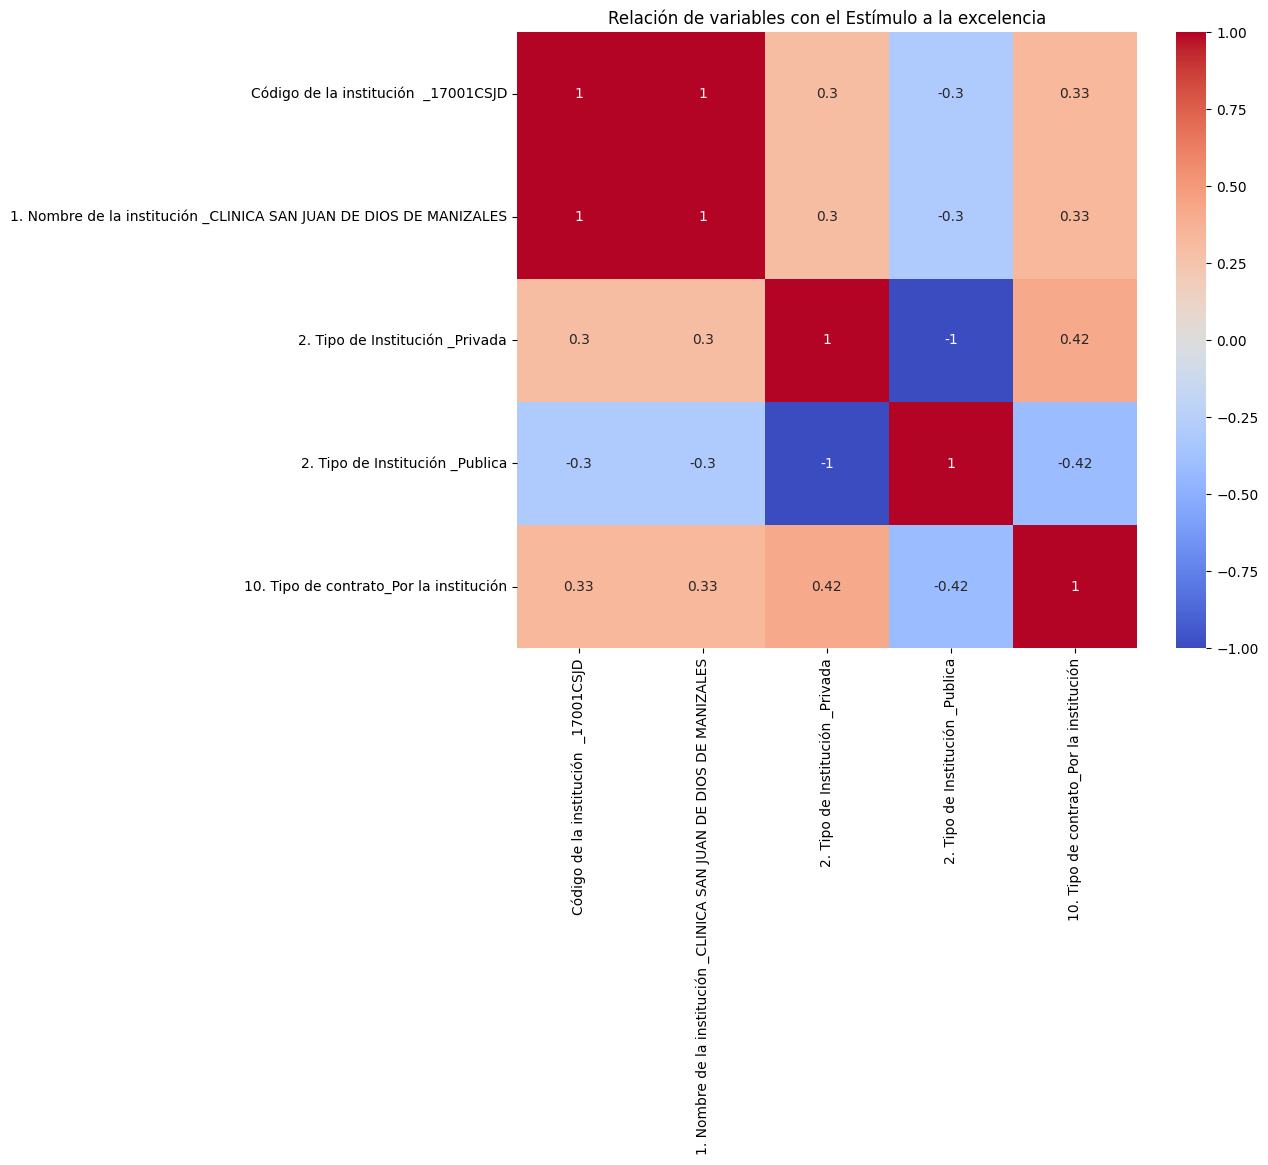

Variables relacionadas con Estímulo a la excelencia:
Código de la institución  _17001CSJD                                  0.262316
1. Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES    0.262316
2. Tipo de Institución _Privada                                       0.242307
2. Tipo de Institución _Publica                                      -0.242307
10. Tipo de contrato_Por la institución                               0.231971
Name: Resultado, dtype: float64


In [ ]:
CONCATENATE=pd.concat([df_filter, df_filter_values.iloc[:,1]], axis=1)
CONCATENATE
# Conversión de variables cualitativas a numéricas
data_encoded = pd.get_dummies(CONCATENATE.iloc[:, :-1])

# Agregar columna de resultado
data_encoded['Resultado'] = CONCATENATE['Estímulo a la excelencia']

# Cálculo de correlaciones
correlations = data_encoded.corr()


# Eliminar variables sin relación
correlations = correlations['Resultado'].drop('Resultado')
correlations = correlations[correlations.abs() > 0.2]  # Establecer umbral de relación

# Filtrar DataFrame con las variables relacionadas
data_filtered = data_encoded[correlations.index]

# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(data_filtered.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Relación de variables con el Estímulo a la excelencia')
plt.show()

# Imprimir variables relacionadas
print("Variables relacionadas con Estímulo a la excelencia:")
print(correlations)

Estímulo al trabajo en equipo

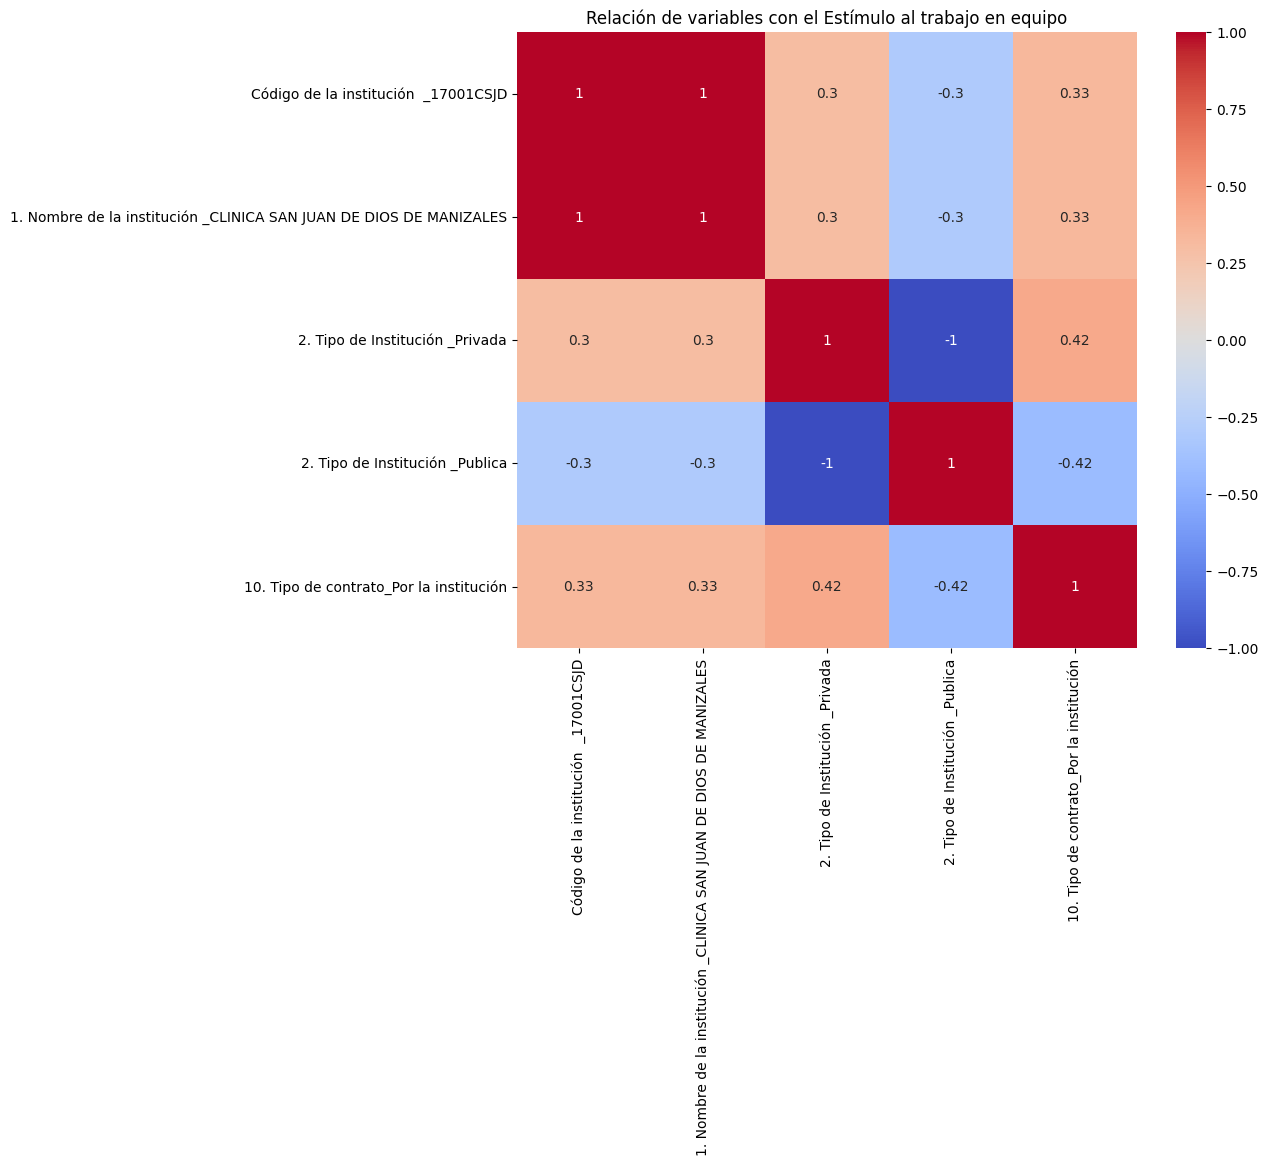

Variables relacionadas con Estímulo al trabajo en equipo
Código de la institución  _17001CSJD                                  0.278532
1. Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES    0.278532
2. Tipo de Institución _Privada                                       0.185384
2. Tipo de Institución _Publica                                      -0.185384
10. Tipo de contrato_Por la institución                               0.153677
Name: Resultado, dtype: float64


In [ ]:
CONCATENATE=pd.concat([df_filter, df_filter_values.iloc[:,2]], axis=1)
CONCATENATE
# Conversión de variables cualitativas a numéricas
data_encoded = pd.get_dummies(CONCATENATE.iloc[:, :-1])

# Agregar columna de resultado
data_encoded['Resultado'] = CONCATENATE['Estímulo al trabajo en equipo']

# Cálculo de correlaciones
correlations = data_encoded.corr()


# Eliminar variables sin relación
correlations = correlations['Resultado'].drop('Resultado')
correlations = correlations[correlations.abs() > 0.15]  # Establecer umbral de relación

# Filtrar DataFrame con las variables relacionadas
data_filtered = data_encoded[correlations.index]

# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(data_filtered.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Relación de variables con el Estímulo al trabajo en equipo')
plt.show()

# Imprimir variables relacionadas
print("Variables relacionadas con Estímulo al trabajo en equipo")
print(correlations)

Solución de conflictos

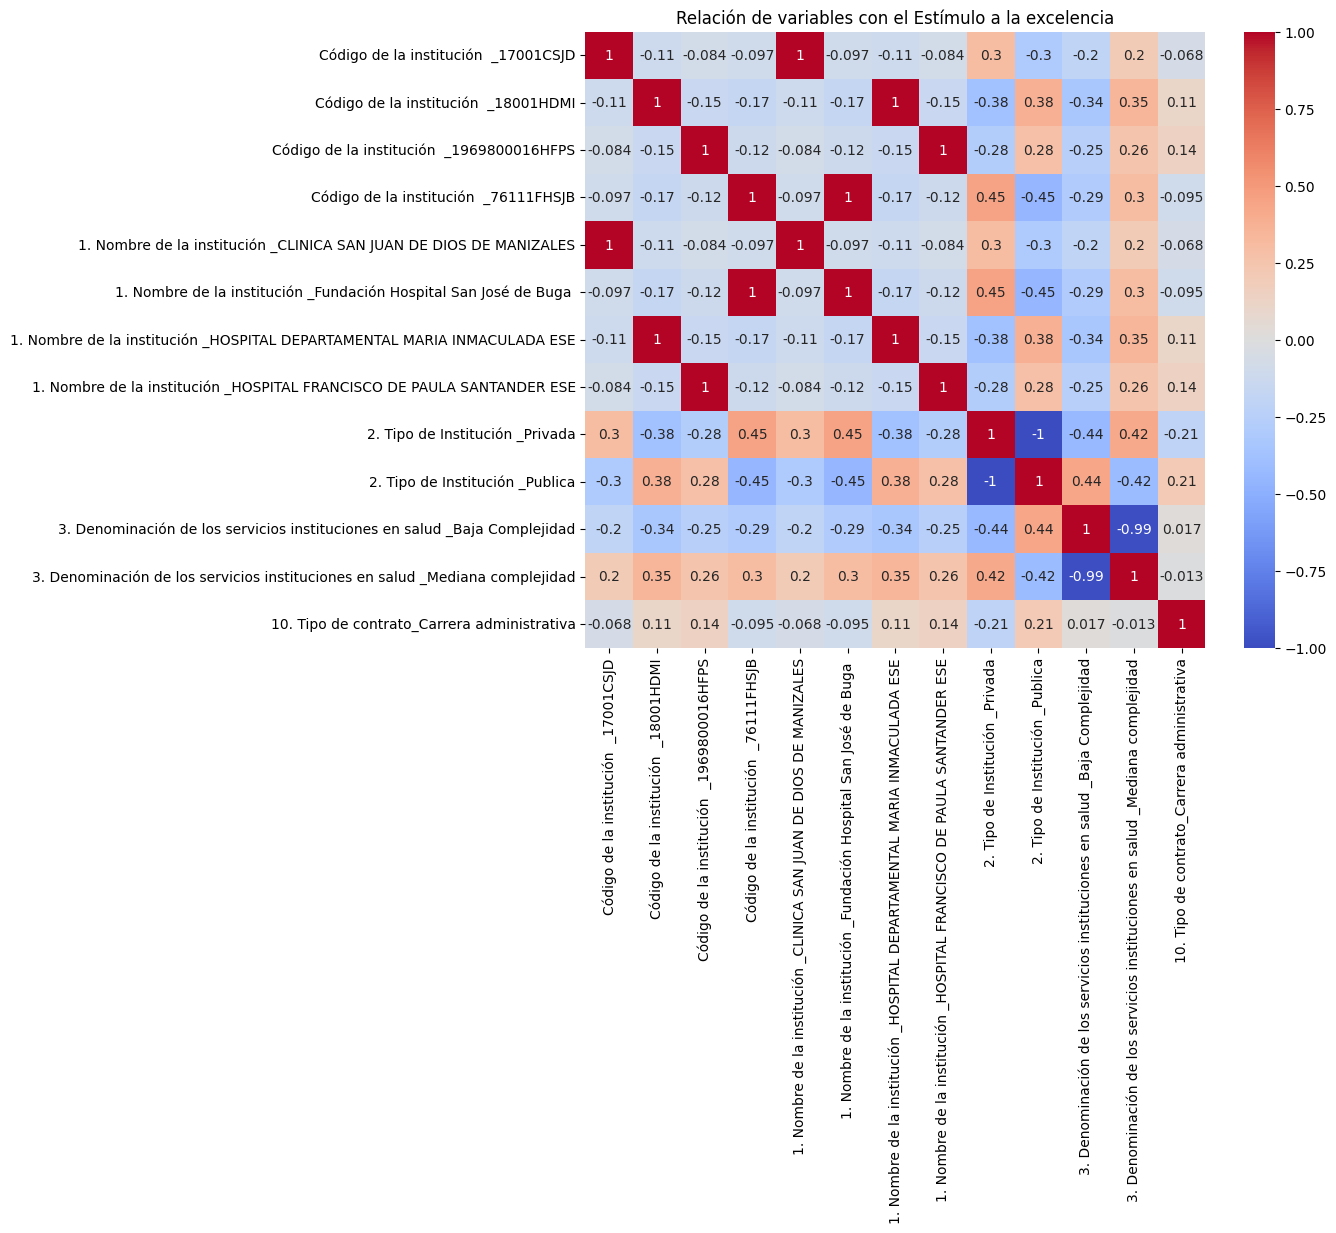

Variables relacionadas con Estímulo a la excelencia:
Código de la institución  _17001CSJD                                            0.109500
Código de la institución  _18001HDMI                                           -0.151298
Código de la institución  _1969800016HFPS                                      -0.182084
Código de la institución  _76111FHSJB                                           0.151627
1. Nombre de la institución _CLINICA SAN JUAN DE DIOS DE MANIZALES              0.109500
1. Nombre de la institución _Fundación Hospital San José de Buga                0.151627
1. Nombre de la institución _HOSPITAL DEPARTAMENTAL MARIA INMACULADA ESE       -0.151298
1. Nombre de la institución _HOSPITAL FRANCISCO DE PAULA SANTANDER ESE         -0.182084
2. Tipo de Institución _Privada                                                 0.138063
2. Tipo de Institución _Publica                                                -0.138063
3. Denominación de los servicios instituciones en salud _

In [ ]:
CONCATENATE=pd.concat([df_filter, df_filter_values.iloc[:,3]], axis=1)
CONCATENATE
# Conversión de variables cualitativas a numéricas
data_encoded = pd.get_dummies(CONCATENATE.iloc[:, :-1])

# Agregar columna de resultado
data_encoded['Resultado'] = CONCATENATE['Solución de conflictos']

# Cálculo de correlaciones
correlations = data_encoded.corr()


# Eliminar variables sin relación
correlations = correlations['Resultado'].drop('Resultado')
correlations = correlations[correlations.abs() > 0.10]  # Establecer umbral de relación

# Filtrar DataFrame con las variables relacionadas
data_filtered = data_encoded[correlations.index]

# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(data_filtered.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Relación de variables con el Estímulo a la excelencia')
plt.show()

# Imprimir variables relacionadas
print("Variables relacionadas con Estímulo a la excelencia:")
print(correlations)

MOTIVACIÓN

Realización personal

In [ ]:
CONCATENATE=pd.concat([df_filter, df_filter_values.iloc[:,4]], axis=1)
CONCATENATE
# Conversión de variables cualitativas a numéricas
data_encoded = pd.get_dummies(CONCATENATE.iloc[:, :-1])

# Agregar columna de resultado
data_encoded['Resultado'] = CONCATENATE['Realización personal']

# Cálculo de correlaciones
correlations = data_encoded.corr()


# Eliminar variables sin relación
correlations = correlations['Resultado'].drop('Resultado')
correlations = correlations[correlations.abs() > 0.2]  # Establecer umbral de relación

print("CORRELACIONES",len(correlations))


if len(correlations)==0:
  print("NO HAY VARIABLES CUALITATIVAS MUY RELACIONADAS")
else:
  # Filtrar DataFrame con las variables relacionadas
  data_filtered = data_encoded[correlations.index]

  # Crear mapa de calor
  plt.figure(figsize=(10, 8))
  sns.heatmap(data_filtered.corr(), annot=True, cmap='coolwarm', center=0)
  plt.title('Relación de variables con el Realización personal')
  plt.show()

  # Imprimir variables relacionadas
  print("Variables relacionadas con Realización personal")
  print(correlations)

CORRELACIONES 0
NO HAY VARIABLES CUALITATIVAS MUY RELACIONADAS


ANALIZANDO SUBVARIABLES Y CRITERIOS

CORRELACIONES 8


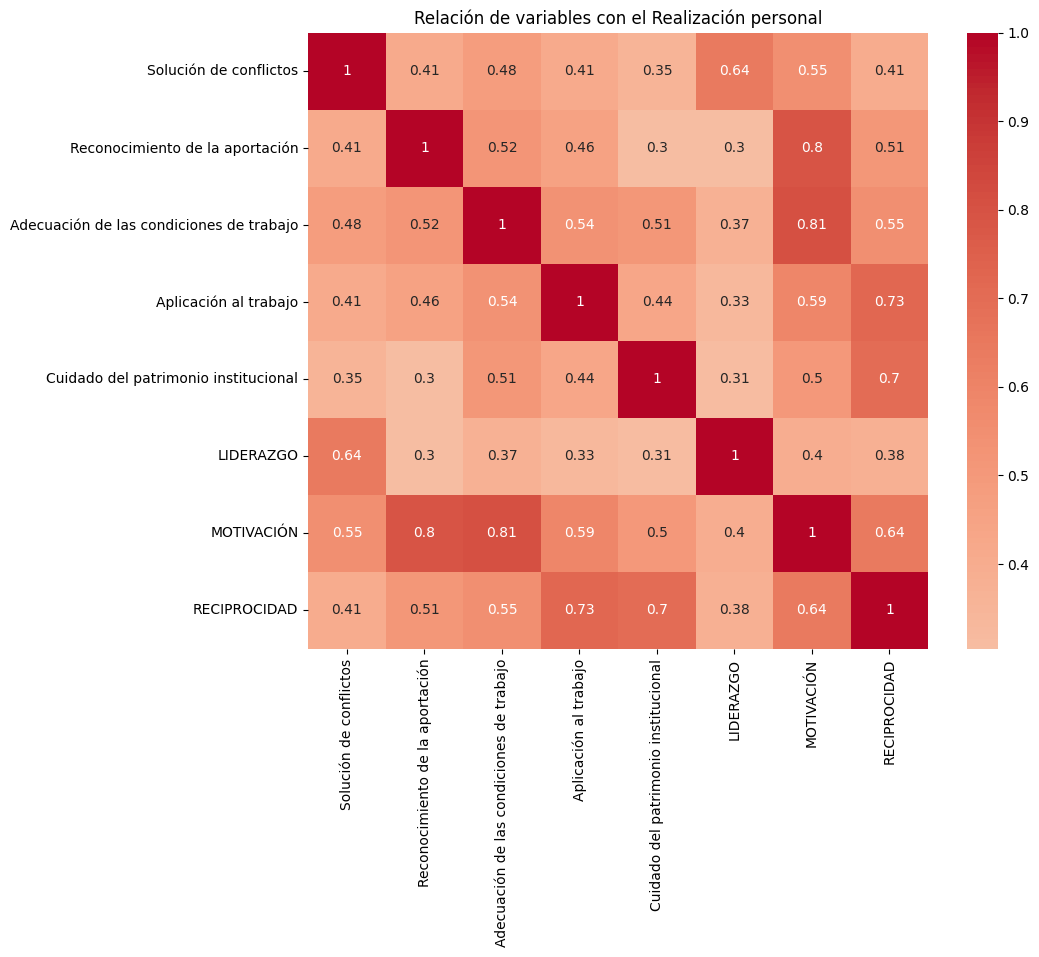

Variables relacionadas con Realización personal
Solución de conflictos                      0.378290
Reconocimiento de la aportación             0.351447
Adecuación de las condiciones de trabajo    0.369715
Aplicación al trabajo                       0.359996
Cuidado del patrimonio institucional        0.331046
LIDERAZGO                                   0.331112
MOTIVACIÓN                                  0.639615
RECIPROCIDAD                                0.399228
Name: Realización personal, dtype: float64


In [ ]:
# CONCATENATE=pd.concat([df_filter, df_filter_values.iloc[:,4]], axis=1)
# CONCATENATE
# Conversión de variables cualitativas a numéricas
#data_encoded = pd.get_dummies(CONCATENATE.iloc[:, :-1])

# Agregar columna de resultado
#data_encoded['Resultado'] = CONCATENATE['Realización personal']

# Cálculo de correlaciones
correlations = df_filter_values.corr()


# Eliminar variables sin relación
correlations = correlations['Realización personal'].drop('Realización personal')
correlations = correlations[correlations.abs() > 0.3]  # Establecer umbral de relación

print("CORRELACIONES",len(correlations))


if len(correlations)==0:
  print("NO HAY VARIABLES CUALITATIVAS MUY RELACIONADAS")
else:
  # Filtrar DataFrame con las variables relacionadas
  data_filtered = df_filter_values[correlations.index]

  # Crear mapa de calor
  plt.figure(figsize=(10, 8))
  sns.heatmap(data_filtered.corr(), annot=True, cmap='coolwarm', center=0)
  plt.title('Relación de variables con el Realización personal')
  plt.show()

  # Imprimir variables relacionadas
  print("Variables relacionadas con Realización personal")
  print(correlations)